In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime

In [30]:
wegodf = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [31]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [32]:
wegodf[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


In [33]:
wegodf['SCHEDULED_TIME'] = pd.to_datetime(wegodf['SCHEDULED_TIME'])

In [34]:
wegodf['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wegodf['ACTUAL_DEPARTURE_TIME'])

In [35]:
wegodf['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wegodf['ACTUAL_ARRIVAL_TIME'])

In [36]:
#useful for iterating over every column and seeing a sample of the unique values within each column:

for series_name, series in wegodf.items():
    print(series_name)
    print(wegodf[series_name].unique())

CALENDAR_ID
[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]
SERVICE_ABBR
[1 2 3]
ADHERENCE_ID
[ 99457890  99457891  99457892 ... 100406612 100406613 100406614]
DATE
['2023-08-01' '2023-08-02' '2023-08-03' '2023-08-04' '2023-08-05'
 '2023-08-06' '2023-08-07' '2023-08-08' '2023-08-09' '2023-08-10'
 '2023-08-11' '2023-08-12' '2023-08-13' '2023-08-14' '2023-08-15'
 '2023-08-16' '2023-08-17' '2023-08-18' '2023-08-19' '2023-08-20'

[      nan 37.666666 36.966666 ... 72.333333 73.516666 79.733333]
HDWY_DEV
[       nan   2.666666   1.966666 ... -21.883334 -22.983334 -17.5     ]
ADJUSTED_EARLY_COUNT
[0 1]
ADJUSTED_LATE_COUNT
[0 1]
ADJUSTED_ONTIME_COUNT
[1 0]
STOP_CANCELLED
[0 1]
PREV_SCHED_STOP_CANCELLED
[ 0. nan  1.]
IS_RELIEF
[0 1]
DWELL_IN_MINS
[ 6.5       0.       12.866666 ... 61.633333 40.716666  0.133333]
SCHEDULED_LAYOVER_MINUTES
[ nan   5.  10.   7.   9.   4.  18.  15.  19.   6.  17.   8.   2.  20.
   3.  11.  31.  13.  14.  22.  29.  21.  23.   0.  12.  43.  16.  41.
  32.  25.  42.  24.  34.  44.  27.  40.  26.  28.  33.  38.  36.  30.
  35.   1.  37.  61. 118.]


## Q1  What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [37]:
wegodf.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [38]:
x = wegodf['ADJUSTED_ONTIME_COUNT'].mean()
print(format(x,'.2%'))

77.08%


In [39]:
wegodf['PREV_SCHED_STOP_CANCELLED'].value_counts().sort_index()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [40]:
wegodf['hdwy_dev_pct'] = (wegodf['HDWY_DEV']/wegodf['SCHEDULED_HDWY'])*100

In [41]:
wegodf = wegodf.dropna(subset=['hdwy_dev_pct'])
wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-25.888893


In [42]:
wegodf[['ROUTE_ABBR', 'PREV_SCHED_STOP_CANCELLED']].groupby(['ROUTE_ABBR'])['PREV_SCHED_STOP_CANCELLED']\
                                                        .value_counts()\
                                                        .reset_index(name = 'sched_stop_count')\
                                                        .sort_values(['sched_stop_count'])

,ROUTE_ABBR,PREV_SCHED_STOP_CANCELLED,sched_stop_count
3,7,1.0,197
9,50,1.0,262
7,23,1.0,299
11,52,1.0,370
1,3,1.0,411
13,55,1.0,451
15,56,1.0,463
5,22,1.0,1182
2,7,0.0,11381
4,22,0.0,15825


In [43]:
wegodf['ADHERENCE'].apply(['min', 'max', 'mean', 'median'])

min      -948.533333
max        85.666666
mean       -3.503421
median     -2.216666
Name: ADHERENCE, dtype: float64

In [44]:
# Calculating Adherence mean and standard deviation
adh_mean = wegodf['ADHERENCE'].mean()
adh_std = np.std(wegodf['ADHERENCE'])

In [45]:
# Calculating headway deviation mean and standard deviation
hdwy_mean = wegodf['HDWY_DEV'].mean()
hdwy_std = np.std(wegodf['HDWY_DEV'])

[Text(0.5, 1.0, 'Overall Adherence Distribution'), Text(0.5, 0, 'Adherence')]

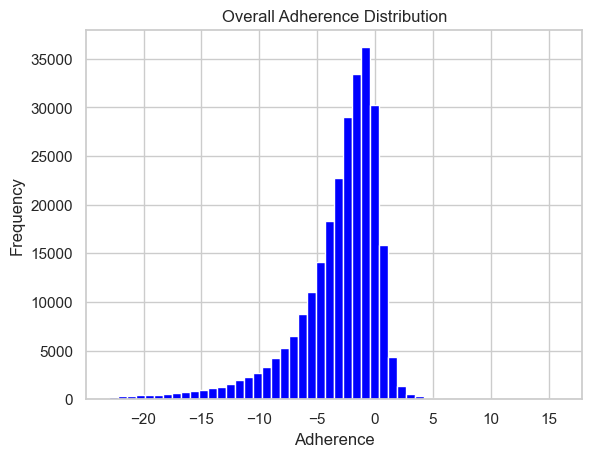

In [46]:
adh_mean_std = (
    wegodf[wegodf['ADHERENCE'].between(adh_mean - adh_std*3,
                                   adh_mean + adh_std*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50, color= 'blue')
)

adh_mean_std.set(
    title='Overall Adherence Distribution',
    xlabel='Adherence'
    )

[Text(0.5, 1.0, 'Overall Headway Deviation Distribution'),
 Text(0.5, 0, 'Headway Deviation')]

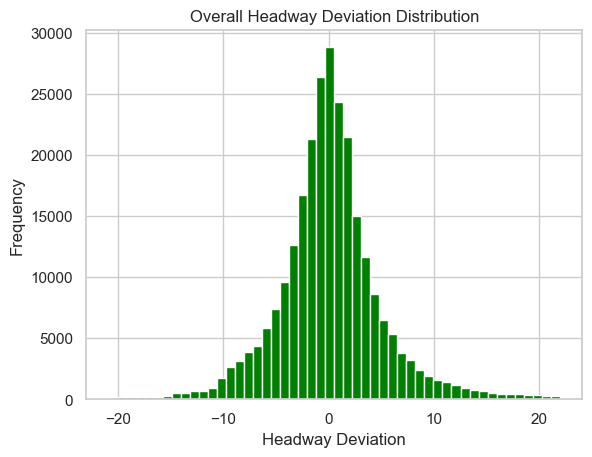

In [47]:
hdwy_mean_std = (
    wegodf[wegodf['HDWY_DEV'].between(hdwy_mean - hdwy_std*3,
                                   hdwy_mean + hdwy_std*3,
                                   inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist',
          bins=50, color= 'green')
)

hdwy_mean_std.set(
    title='Overall Headway Deviation Distribution',
    xlabel='Headway Deviation'
    )

In [48]:
#Removing rows with PREV_SCHED_STOP_CANCELLED equal to 1.0
no_sched_stop = wegodf.query('`PREV_SCHED_STOP_CANCELLED` == 1.0')
no_sched_stop = wegodf[~(wegodf['PREV_SCHED_STOP_CANCELLED'] ==1.0)] 
no_sched_stop

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-25.888893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,6.716666,0,0,1,0,0.0,0,7.033333,NaN,22.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,4.916666,0,1,0,0,0.0,0,1.966666,5.0,16.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,17.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,6.222220


C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


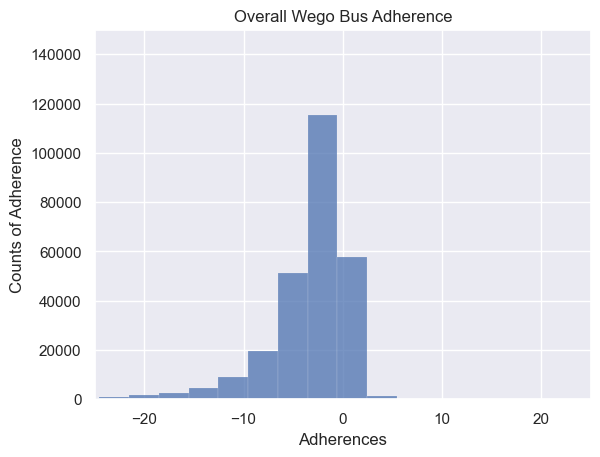

In [49]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


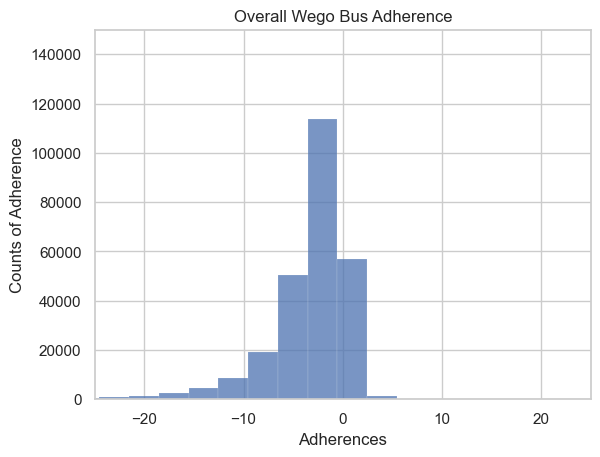

In [50]:
#Overall distribution of adherence with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


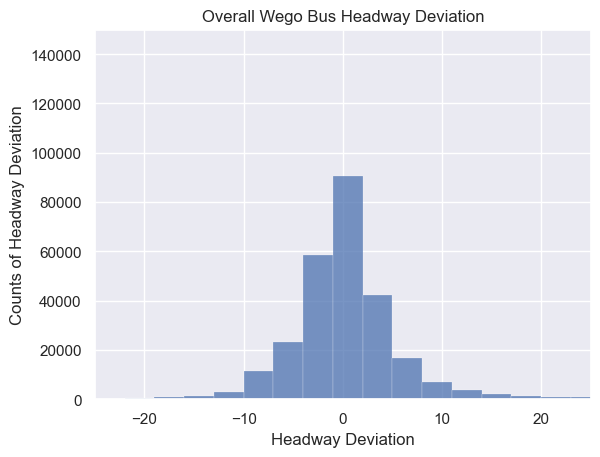

In [51]:
#Overall distribution of headway deviation
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


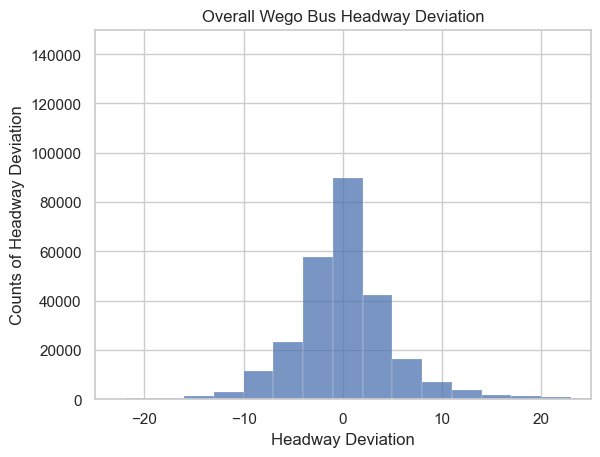

In [52]:
#Overall distribution of headway deviation with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

In [54]:
no_sched_stop = wegodf.query('PREV_SCHED_STOP_CANCELLED == 1.0') no_sched_stop = wegodf[~(wegodf['PREV_SCHED_STOP_CANCELLED'] ==1.0)] no_sched_stop

SyntaxError: invalid syntax (3965395499.py, line 1)

## Q2. How does direction of travel, route, or location affect the headway and on-time performance?

In [55]:
#Headway deviation percentage as per read me file
wegodf['hdwy_dev_pct'] = (wegodf['HDWY_DEV']/wegodf['SCHEDULED_HDWY'])*100
wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-25.888893


In [19]:
wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,FROM DOWNTOWN,-33.600000,0,1
1,3,FROM DOWNTOWN,-33.366667,0,1
2,3,FROM DOWNTOWN,-33.216667,0,1
3,3,FROM DOWNTOWN,-32.783334,1,1
4,3,FROM DOWNTOWN,-30.233334,0,1
...,...,...,...,...,...
39649,56,FROM DOWNTOWN,-0.266667,1,63
42516,56,TO DOWNTOWN,0.000000,1,64
42520,56,TO DOWNTOWN,0.050000,1,66
42530,56,TO DOWNTOWN,0.166666,1,66


In [56]:
wegodf['acceptable_hdwy'] = (wegodf['hdwy_dev_pct']>=-50)&(wegodf['hdwy_dev_pct']<=50)

In [57]:
wegodf['bunching_hdwy'] = (wegodf['hdwy_dev_pct']<-50)
wegodf['gapping_hdwy'] = (wegodf['hdwy_dev_pct']>50)

In [58]:
wegodf['acceptable_hdwy'].sum()

225918

In [20]:
wegodf.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [59]:
wegodf[wegodf['bunching_hdwy']==1].head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,acceptable_hdwy,bunching_hdwy,gapping_hdwy
186,120230801,1,99458078,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-61.527783,False,True,False
200,120230801,1,99458092,2023-08-01,22,2201,2427,345233,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-68.333333,False,True,False
464,120230801,1,99458362,2023-08-01,22,2211,1761,345426,0,FROM DOWNTOWN,...,1,0,0.0,0,15.766666,10.0,-51.794877,False,True,False
470,120230801,1,99458368,2023-08-01,22,2211,1761,345428,0,FROM DOWNTOWN,...,1,0,0.0,0,13.533333,10.0,-60.769231,False,True,False
471,120230801,1,99458369,2023-08-01,22,2211,1761,345428,0,FROM DOWNTOWN,...,0,0,0.0,0,2.933333,NaN,-53.717954,False,True,False


In [21]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [60]:
# Headway columns by Route Direction
rte_dir_totals = (
    wegodf.groupby('ROUTE_DIRECTION_NAME')
         [['bunching_hdwy', 'acceptable_hdwy', 'gapping_hdwy']]
         .sum()
)
# Adding totals columns
rte_dir_totals['totals'] = rte_dir_totals.sum(axis=1)
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy,totals
ROUTE_DIRECTION_NAME,,,,
FROM DOWNTOWN,11755,115922,13715,141392
TO DOWNTOWN,6244,109996,8258,124498


In [61]:
each_route_with_counts_on_time_and_direction = wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR'])


In [62]:
each_route_with_counts_on_time_and_direction.head

<bound method NDFrame.head of     ROUTE_ABBR  ADJUSTED_ONTIME_COUNT ROUTE_DIRECTION_NAME  ontime_count
0            3                      1          TO DOWNTOWN         15527
1            3                      1        FROM DOWNTOWN         12550
2            3                      0        FROM DOWNTOWN          5732
3            3                      0          TO DOWNTOWN          2774
4            7                      1          TO DOWNTOWN          4884
5            7                      1        FROM DOWNTOWN          4380
6            7                      0        FROM DOWNTOWN          1505
7            7                      0          TO DOWNTOWN           809
8           22                      1        FROM DOWNTOWN          7689
9           22                      1          TO DOWNTOWN          7374
10          22                      0        FROM DOWNTOWN          1258
11          22                      0          TO DOWNTOWN           686
14          23       

In [29]:
x = wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'count')\
                                                        .sort_values(['ROUTE_ABBR'])

In [30]:
x.head

<bound method NDFrame.head of     ROUTE_ABBR  ADJUSTED_ONTIME_COUNT ROUTE_DIRECTION_NAME  count
0            3                      1          TO DOWNTOWN  19069
1            3                      1        FROM DOWNTOWN  15447
2            3                      0        FROM DOWNTOWN   8203
3            3                      0          TO DOWNTOWN   4443
4            7                      1          TO DOWNTOWN   6875
5            7                      1        FROM DOWNTOWN   6542
6            7                      0        FROM DOWNTOWN   2629
7            7                      0          TO DOWNTOWN   1980
8           22                      1          TO DOWNTOWN  11484
9           22                      1        FROM DOWNTOWN  11008
10          22                      0        FROM DOWNTOWN   2380
11          22                      0          TO DOWNTOWN   1087
14          23                      0        FROM DOWNTOWN   4679
15          23                      0         

In [65]:
# Percentages columns for hdwy categories
rte_dir_totals.loc[:, 'bunching_hdwy_pct'] = (rte_dir_totals['bunching_hdwy'] / 
                                                rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'acceptable_hdwy_pct'] = (rte_dir_totals['acceptable_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'gapping_hdwy_pct'] = (rte_dir_totals['gapping_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy,totals,bunching_hdwy_pct,acceptable_hdwy_pct,gapping_hdwy_pct
ROUTE_DIRECTION_NAME,,,,,,,
FROM DOWNTOWN,11755,115922,13715,141392,8.313766,81.986251,9.699983
TO DOWNTOWN,6244,109996,8258,124498,5.015342,88.351620,6.633038


In [66]:
# Percentages columns for hdwy categories
rte_dir_totals.loc[:, 'bunching_hdwy_pct'] = (rte_dir_totals['bunching_hdwy'] / 
                                                rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'acceptable_hdwy_pct'] = (rte_dir_totals['acceptable_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals.loc[:, 'gapping_hdwy_pct'] = (rte_dir_totals['gapping_hdwy'] / 
                                                    rte_dir_totals['totals'] * 100)
rte_dir_totals

,bunching_hdwy,acceptable_hdwy,gapping_hdwy,totals,bunching_hdwy_pct,acceptable_hdwy_pct,gapping_hdwy_pct
ROUTE_DIRECTION_NAME,,,,,,,
FROM DOWNTOWN,11755,115922,13715,141392,8.313766,81.986251,9.699983
TO DOWNTOWN,6244,109996,8258,124498,5.015342,88.351620,6.633038


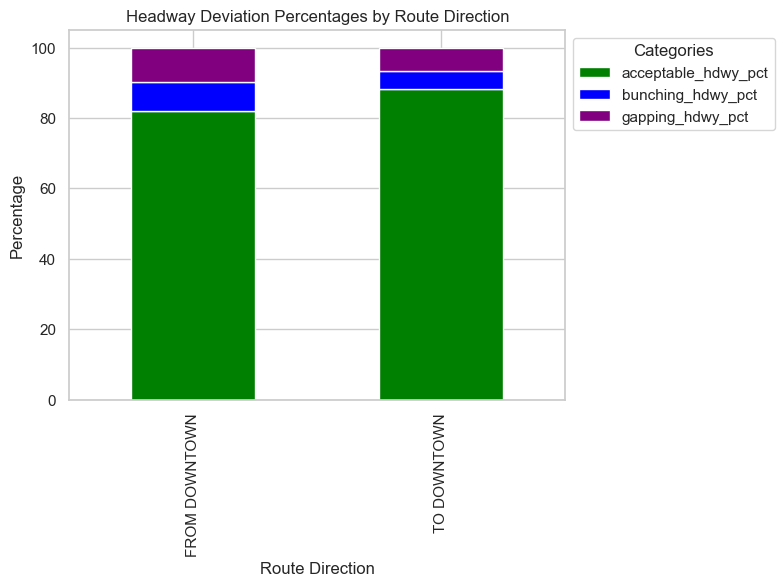

In [67]:
## Needs a little work, gotta tweak the legend names

(rte_dir_totals[['acceptable_hdwy_pct', 'bunching_hdwy_pct', 'gapping_hdwy_pct']]).plot(kind='bar', stacked=True, color=['green', 'blue', 'purple'])
plt.xlabel('Route Direction')
plt.ylabel('Percentage')
plt.title('Headway Deviation Percentages by Route Direction')
plt.legend(title = 'Categories', bbox_to_anchor=(1, 1))

In [68]:
# Headway columns by Route Direction, and adding a totals columns
route_dir_ELO_totals = (
    wegodf.groupby('ROUTE_DIRECTION_NAME')
         [['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']]
         .sum()
)

route_dir_ELO_totals['totals'] = route_dir_ELO_totals.sum(axis=1)
route_dir_ELO_totals

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,totals
ROUTE_DIRECTION_NAME,,,,
FROM DOWNTOWN,105987,30894,4511,141392
TO DOWNTOWN,105309,14937,4252,124498


## Q3. How does time of day or day of week affect headway and on-time performance?

In [69]:
wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,acceptable_hdwy,bunching_hdwy,gapping_hdwy
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,13.216666,10.0,7.619046,True,False,False
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,5.619046,True,False,False
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-3.222227,True,False,False
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,10.800000,5.0,-14.444447,True,False,False
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-25.888893,True,False,False


In [70]:
#Seeing route, weekday/weekend aka 'SERVICE_ABBR', HDWY_DEV, and ADJUSTED_ONTIME_COUNT

wegodf[['ROUTE_ABBR', 'SERVICE_ABBR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','SERVICE_ABBR', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,SERVICE_ABBR,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,1,-33.600000,0,1
1,3,1,-33.366667,0,1
2,3,1,-33.216667,0,1
3,3,1,-32.783334,1,1
4,3,1,-30.233334,0,1
...,...,...,...,...,...
42020,56,1,0.066666,1,91
41980,56,1,-0.266667,1,93
42006,56,1,-0.050000,1,97
42067,56,1,0.466666,1,97


In [71]:
#Seeing route, weekday/weekend aka 'SERVICE_ABBR', hdwy_dev_pct, and ADJUSTED_ONTIME_COUNT

wegodf[['ROUTE_ABBR', 'SERVICE_ABBR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','SERVICE_ABBR', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,SERVICE_ABBR,hdwy_dev_pct,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,1,-100.000000,0,1
1,3,1,-100.000000,1,1
2,3,1,-99.888893,0,1
3,3,1,-99.871800,0,1
6,3,1,-99.777780,1,1
...,...,...,...,...,...
90994,56,1,-0.166670,1,75
91565,56,1,5.500000,1,75
90755,56,1,-2.500000,1,83
90955,56,1,-0.500000,1,88


In [72]:
# Convert DATE column to datetime format
wegodf['DATE'] = pd.to_datetime(wegodf['DATE'])

In [73]:
# Create DAYS_OF_THE_WEEK column
wegodf['DAYS_OF_THE_WEEK'] = wegodf['DATE'].dt.day_name()

In [74]:
#Reordering the days of the week on the chart:
day_of_week_stats_hdwy = wegodf.groupby('DAYS_OF_THE_WEEK')['HDWY_DEV'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_hdwy = day_of_week_stats_hdwy.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_hdwy

,DAYS_OF_THE_WEEK,HDWY_DEV
3,Sunday,0.967552
1,Monday,0.283829
5,Tuesday,0.385643
6,Wednesday,0.378740
4,Thursday,0.534189
0,Friday,0.669558
2,Saturday,0.645084


C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


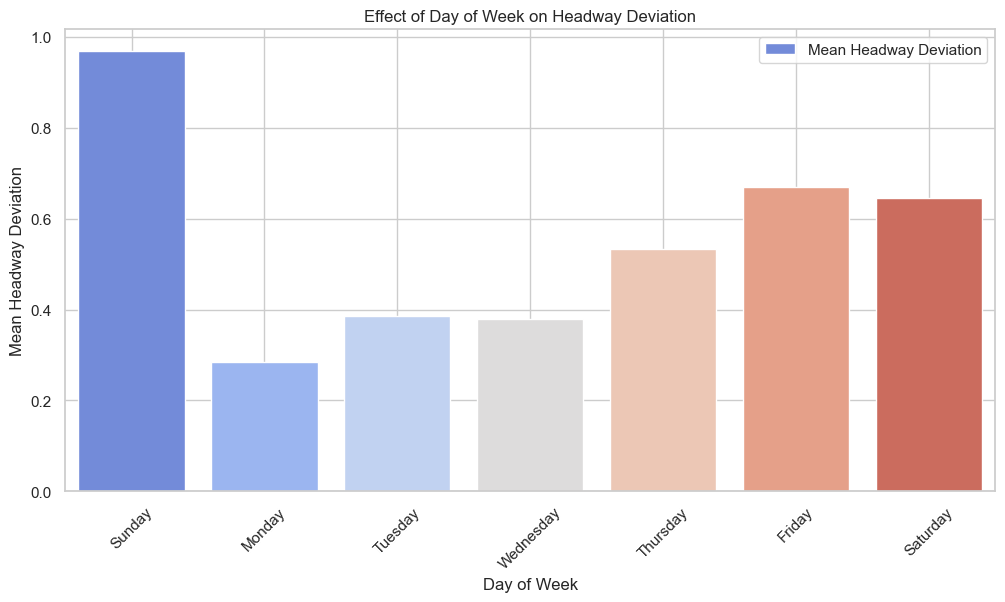

In [75]:
# Day of the week/ Headway
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_stats_hdwy, x='DAYS_OF_THE_WEEK', y='HDWY_DEV', label='Mean Headway Deviation', palette='coolwarm')
plt.title('Effect of Day of Week on Headway Deviation')
plt.xlabel('Day of Week')
plt.ylabel('Mean Headway Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [76]:
#Reordering the days of the week on the chart with hdwy_dev_pct:
day_of_week_stats_hdwy_pct = wegodf.groupby('DAYS_OF_THE_WEEK')['hdwy_dev_pct'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_hdwy_pct['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_hdwy_pct = day_of_week_stats_hdwy_pct.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_hdwy_pct

,DAYS_OF_THE_WEEK,hdwy_dev_pct
6,Sunday,inf
5,Monday,inf
4,Tuesday,inf
3,Wednesday,3.665459
2,Thursday,2.288846
1,Friday,inf
0,Saturday,inf


C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


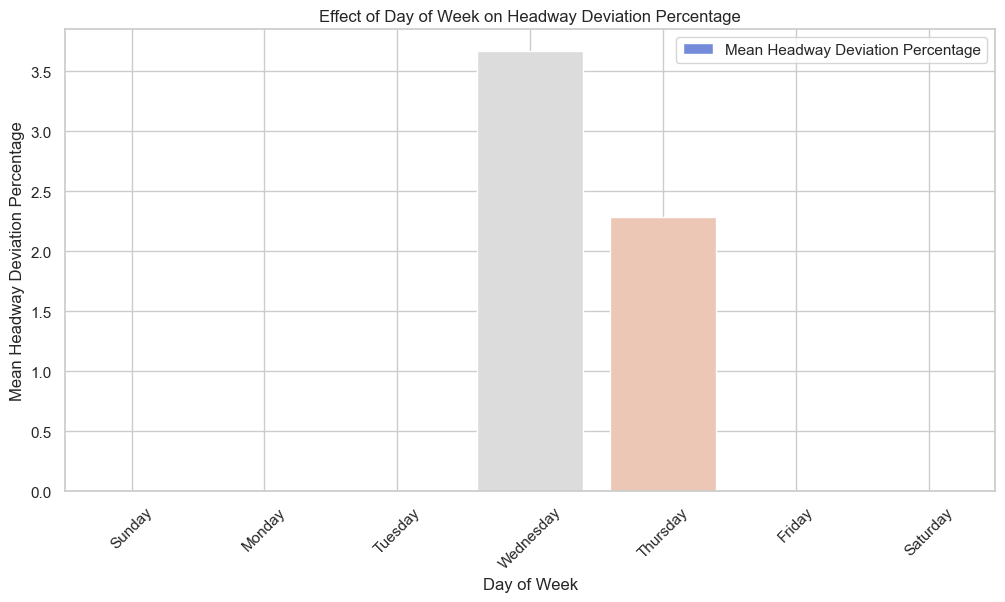

In [77]:
# Day of the week/ Headway Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_stats_hdwy_pct, x='DAYS_OF_THE_WEEK', y='hdwy_dev_pct', label='Mean Headway Deviation Percentage', palette='coolwarm')
plt.title('Effect of Day of Week on Headway Deviation Percentage')
plt.xlabel('Day of Week')
plt.ylabel('Mean Headway Deviation Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [78]:
wegodf['ACTUAL_ARRIVAL_TIME']

7        2023-08-01 05:30:30
8        2023-08-01 05:47:55
9        2023-08-01 05:54:11
11       2023-08-01 06:05:31
12       2023-08-01 06:23:30
                 ...        
350320   2023-09-30 21:43:52
350323   2023-09-30 22:22:39
350324   2023-09-30 22:31:26
350326   2023-09-30 22:49:19
350327   2023-09-30 23:21:05
Name: ACTUAL_ARRIVAL_TIME, Length: 265890, dtype: datetime64[ns]

## Q4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [80]:
#Seeing operator with route and adj ontime count and hdwy dev

wegodf[['ROUTE_ABBR', 'OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','OPERATOR', 'HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,OPERATOR,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,326,-16.650000,1,1
1,3,326,-14.933334,1,1
2,3,326,-14.783334,0,1
3,3,326,-14.750000,1,1
4,3,326,-14.716667,1,1
...,...,...,...,...,...
166517,56,1372,1.200000,1,9
170603,56,1717,-0.333334,1,9
178905,56,2161,-0.533334,1,9
165498,56,1343,-2.383334,1,10


In [81]:
operator_effects = wegodf[['OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['OPERATOR', 'HDWY_DEV']).count().reset_index()
operator_effects

,OPERATOR,HDWY_DEV,ADJUSTED_ONTIME_COUNT
0,56,-0.766667,1
1,56,0.266666,1
2,235,-4.700000,1
3,235,-4.583334,1
4,235,-2.450000,1
...,...,...,...
154348,3173,2.883333,1
154349,3173,3.033333,1
154350,3173,3.400000,1
154351,3173,4.533333,1


In [82]:
#Seeing operator with route and adj ontime count and hdwy dev pct

wegodf[['ROUTE_ABBR', 'OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['ROUTE_ABBR','OPERATOR', 'hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,OPERATOR,hdwy_dev_pct,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,326,-99.500000,0,1
1,3,326,-98.555560,0,1
2,3,326,-98.500000,0,1
3,3,326,-97.777780,0,1
4,3,326,-97.222227,0,1
...,...,...,...,...,...
185830,56,1177,-13.666670,1,9
185849,56,1177,-10.333340,1,9
190526,56,1372,-10.000000,1,9
190600,56,1372,0.000000,1,9


In [83]:
operator_effects_pcts = wegodf[['OPERATOR', 'ADJUSTED_ONTIME_COUNT', 'hdwy_dev_pct']].groupby(['OPERATOR', 'hdwy_dev_pct']).count().reset_index()
operator_effects_pcts

,OPERATOR,hdwy_dev_pct,ADJUSTED_ONTIME_COUNT
0,56,-7.666670,1
1,56,2.666660,1
2,235,-38.194450,1
3,235,-20.416667,1
4,235,-19.583333,1
...,...,...,...
205668,3173,24.027775,1
205669,3173,25.277775,1
205670,3173,28.333333,1
205671,3173,37.777775,1


In [84]:
wegodf['OPERATOR'].nunique()

334

In [85]:
wegodf['OPERATOR'].value_counts()

OPERATOR
1266    2390
1133    2177
304     2026
2399    2024
332     2015
        ... 
2313       8
2377       7
2256       4
56         2
656        1
Name: count, Length: 334, dtype: int64

In [86]:
operator_pct = (wegodf.groupby(['OPERATOR','HDWY_DEV'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum())
operator_pct

OPERATOR  HDWY_DEV 
56        -0.766667    0.500000
           0.266666    0.500000
235       -4.700000    0.000000
          -4.583334    0.000000
          -2.450000    0.200000
                         ...   
3173       2.883333    0.071429
           3.033333    0.071429
           3.400000    0.071429
           4.533333    0.071429
           6.083333    0.071429
Name: ADJUSTED_ONTIME_COUNT, Length: 154353, dtype: float64

In [87]:
operator_hdwy_pct = (wegodf.groupby(['OPERATOR','hdwy_dev_pct'])['ADJUSTED_ONTIME_COUNT'].sum()/wegodf.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum())
operator_hdwy_pct

OPERATOR  hdwy_dev_pct
56        -7.666670       0.500000
           2.666660       0.500000
235       -38.194450      0.000000
          -20.416667      0.200000
          -19.583333      0.000000
                            ...   
3173       24.027775      0.071429
           25.277775      0.071429
           28.333333      0.071429
           37.777775      0.071429
           50.694442      0.071429
Name: ADJUSTED_ONTIME_COUNT, Length: 205673, dtype: float64